<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

En la carpeta Ficheros_R4.csv, se encuentran ficheros descargados de un banco, cuya caracteística principal es que utiliza la coma como separador decimal y \t como separador.

Importo cualquiera de estos ficheros individualmente y los grafico, con normalidad, como podemos ver a continuación.

<AxesSubplot:title={'center':'Line Plot'}, xlabel='Date'>

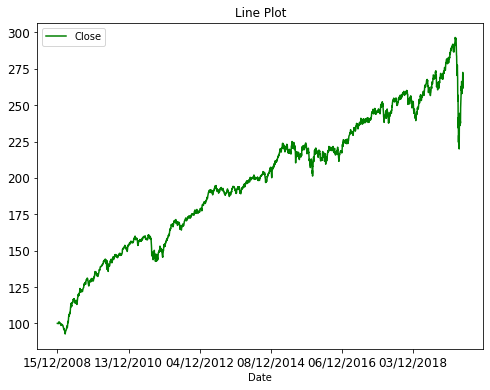

In [41]:
import pandas as pd

df = pd.read_csv("./Ficheros_R4_csv/Acatis.csv",
                     decimal  =",",  na_values = ["nan"], sep='\t')
df.set_index("Date", inplace=True)    
df.plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2854 entries, 15/12/2008 to  
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2852 non-null   float64
dtypes: float64(1)
memory usage: 44.6+ KB


Vemos que la columna Date es del tipo object. A continuación convertimos esta columna al tipo datetime64 y , la hacemos índice del df y graficamos.

 A continuación intento importar haciendo directamente "Date" índice del df y del tipo datetime.

<class 'pandas.core.frame.DataFrame'>
Index: 2854 entries, 15/12/2008 to  
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2852 non-null   float64
dtypes: float64(1)
memory usage: 44.6+ KB


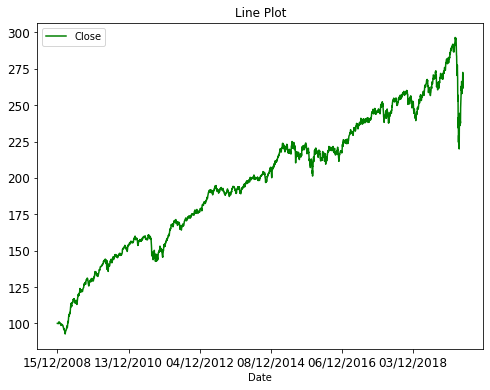

In [35]:
import pandas as pd

df = pd.read_csv("./Ficheros_R4_csv/Acatis.csv",index_col = "Date", parse_dates = ["Date"],
                     decimal  =",",  na_values = ["nan"], sep='\t')
df.plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)
df.info()

Date es ahora el índice del df, pero no es del formato datetime64, como yo deseo. Intento cambiar dicho formato haciendo:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2008-12-15 to NaT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2852 non-null   float64
dtypes: float64(1)
memory usage: 44.6 KB


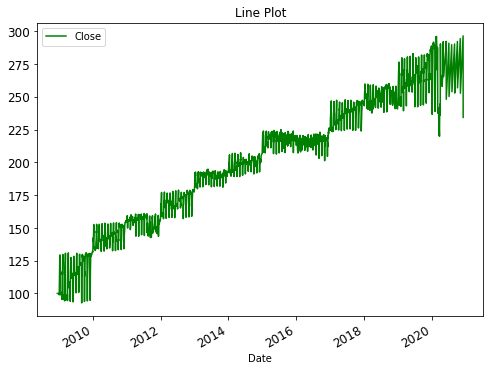

In [43]:
import pandas as pd

df = pd.read_csv("./Ficheros_R4_csv/Acatis.csv",index_col = "Date", parse_dates = ["Date"],
                     decimal  =",",  na_values = ["nan"], sep='\t')

df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index("Date", inplace=True)

df.plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)
df.info()

## Importando de ficheros descargados de Yahoo

La diferencia con los ficheros anteriores, es que el decimal es el punto y el separador la coma. 

<AxesSubplot:title={'center':'Line Plot'}, xlabel='Date'>

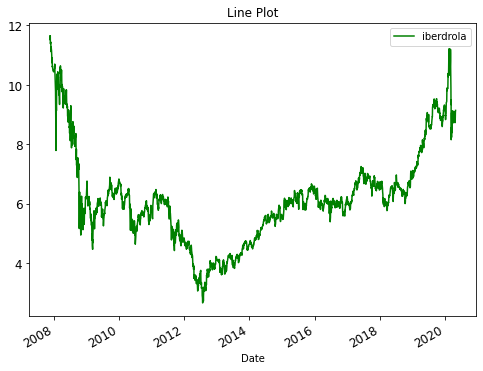

In [25]:
# Importar ficheros csv descargados de Renta 4
import glob 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from datetime import date

# Dirección para obtener los ficheros 
path = "/media/enri/Mi_Proyecto/Py_Proyecto_2020/Py_Paso_Peregrino/Ficheros_Yahoo_csv/"

"""Importa los datos de los ficheros csv de una dirección determinada"""
filenames = glob.glob(path + "*.csv") 
dfs = []
nombres = []
for filename in filenames: 
    nombre = filename[len(path):-4] 
    nombres.append(nombre)    
    #dfs.append(pd.read_csv(filename, index_col = "Date", names = nombres))
    dfs.append( pd.read_csv(filename ,index_col = "Date", parse_dates = ["Date"], 
                            na_values = ["nan"]))
dfs = iter(dfs)
df_yahoo = next(dfs)
for df_ in dfs:
    df_yahoo = df_yahoo.merge(df_, on='Date')
    
#df_yahoo = df_yahoo.set_index("Date")
    
df_yahoo.columns = nombres
#df_yahoo.dropna(inplace = True)

df_yahoo.reset_index(inplace = True)

df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'], errors='coerce')
#df_yahoo['Date'] = df_yahoo['Date'].dt.strftime('%d/%m/%Y')

df_yahoo = df_yahoo.set_index("Date")

df_yahoo[["iberdrola"]].plot(figsize=(8, 6), color='green', title = 'Line Plot', fontsize=12)

In [26]:
df_yahoo[["iberdrola"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2876 entries, 2007-11-14 to 2020-04-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iberdrola  2876 non-null   float64
dtypes: float64(1)
memory usage: 44.9 KB
